In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from qcircuit.quantumcircuit import QuantumCircuit
from qcircuit.quantumregister import QuantumRegister
from qcircuit.classicalregister import ClassicalRegister
from qcircuit.gates import gates

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Tests

## Check that the circuits are correctly initialized

In [3]:
qc = QuantumCircuit(QuantumRegister(2), ClassicalRegister(2))

#### assertions ####s
assert qc.quantumRegister.amplitudes.all() == np.complex128([(1+0j), (0+0j), (0+0j), (0+0j)]).all()
assert qc.classicalRegister.values.all() == np.array([0,0]).all()
print('Quantum register initialized the state |00> : ',qc.quantumRegister.formatAmplitudes())
print('Classical register initialized in the state 00', qc.classicalRegister.formatValues())

Quantum register initialized the state |00> :  [(1+0j), 0j, 0j, 0j]
Classical register initialized in the state 00 [0.0, 0.0]


## There are two ways of applying gates
    *Sequentially* :
        - Initialize the quantum and classical register
        - Apply sequentially the gates
        - Measure at the end, if we want a classical outcome
    n this case, each time a gate is applyed by (e.g. by the fuction `applySingleGate`)
    *All at once*
        - Initialize the quantum and classical register
        - Specify an array of tuples such as [('H', 1), ('Cnot', (1,2)), ('X', 2), ('Z', 1)]]
        - Apply the overall matrix on the quantumRegister by invoking `applyMultipleGatesAtOnce`
        - Measure the state at the end, if wishes
    In this case, each individual gate set is generated as a sparse matrix, and all the matrix multiplications are done over sparse matrices.
    
    Using the second method, is less resource-intensive as only the final matrix is densed. 

### The first test is generating the bell states using the sequential model
    |Phi^+> = (H1 \otimes Cnot(1,2))|00> 
    |Phi^-> = (H1 \otimes Cnot(1,2)Z2) |00>
    |Psi^+> = (H1 \otimes Cnot(1,2)X2) |00>
    |Psi^-> = (H1 \otimes Cnot(1,2)X2 Z1) |00>

Apply H_1, getting  [array([0.7071+0.j, 0.    +0.j, 0.7071+0.j, 0.    +0.j])]
Amplitudeds of |Phi^+> are  [array([0.7071+0.j, 0.    +0.j, 0.    +0.j, 0.7071+0.j])]


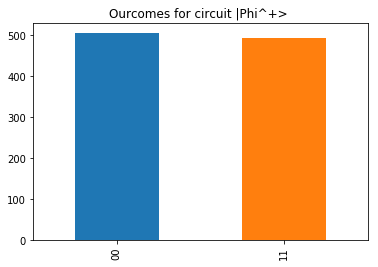

In [4]:
qc = QuantumCircuit(QuantumRegister(2), ClassicalRegister(2)) # Create th register
qc.setName('|Phi^+>')
qc.quantumRegister.applySingleGate('H', 1) # Apply H on qubit 1
print('Apply H_1, getting ', qc.quantumRegister.formatAmplitudes()) # Read out the amplitudes
qc.quantumRegister.applyCnotGate(1,2) # Apply a Cnot between qubit 1 and qubit 2
print('Amplitudeds of |Phi^+> are ', qc.quantumRegister.formatAmplitudes()) # Read out the amplitudes
qc.readOut('classical') # Perform the measurements, and store the values in the classical register

"""
Note that now qc.classicalRegister.values holds the result for a single measurement;
In order to check the statistics we can use the `qc.generateStatistics` method which calls readOut over the
fixed number of measurements `n_measurements`
"""

qc.plotResults(stats=qc.generateStatistics(n_measurements=1000)) #This simply plots the results
plt.show()

Amplitudeds of |Phi^-> are  [array([ 0.7071+0.j,  0.    +0.j,  0.    +0.j, -0.7071+0.j])]


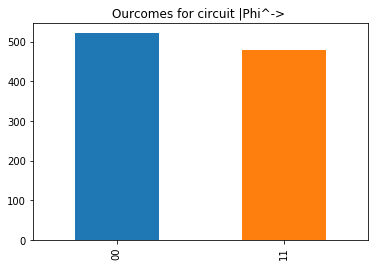

In [5]:
qc = QuantumCircuit(QuantumRegister(2), ClassicalRegister(2))
qc.setName('|Phi^->')
qc.quantumRegister.applySingleGate('H', 1)
qc.quantumRegister.applyCnotGate(1,2)
qc.quantumRegister.applySingleGate('Z', 2)
print('Amplitudeds of |Phi^-> are ', qc.quantumRegister.formatAmplitudes())
qc.readOut('classical')
qc.plotResults(stats=qc.generateStatistics(n_measurements=1000))
plt.show()

Amplitudeds of |Psi^+> are  [array([0.    +0.j, 0.7071+0.j, 0.7071+0.j, 0.    +0.j])]


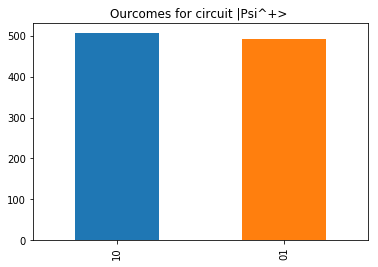

In [6]:
qc = QuantumCircuit(QuantumRegister(2), ClassicalRegister(2))
qc.setName('|Psi^+>')
qc.quantumRegister.applySingleGate('H', 1)
qc.quantumRegister.applyCnotGate(1,2)
qc.quantumRegister.applySingleGate('X', 2)
print('Amplitudeds of |Psi^+> are ', qc.quantumRegister.formatAmplitudes())
qc.readOut('classical')
qc.plotResults(stats=qc.generateStatistics(n_measurements=1000))
plt.show()

Amplitudeds of |Psi^-> are  [array([ 0.    +0.j,  0.7071+0.j, -0.7071+0.j,  0.    +0.j])]


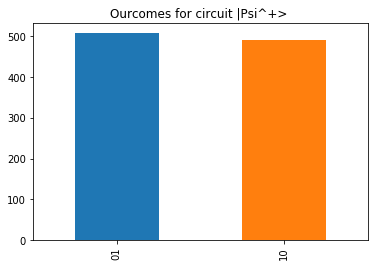

In [7]:
qc = QuantumCircuit(QuantumRegister(2), ClassicalRegister(2))
qc.setName('|Psi^+>')
qc.quantumRegister.applySingleGate('H', 1)
qc.quantumRegister.applyCnotGate(1,2)
qc.quantumRegister.applySingleGate('X', 2)
qc.quantumRegister.applySingleGate('Z', 1)
print('Amplitudeds of |Psi^-> are ', qc.quantumRegister.formatAmplitudes())
qc.readOut('classical')
qc.plotResults(stats=qc.generateStatistics(n_measurements=1000))
plt.show()

## Check that we obtain the same results with the allAtOnce model

In [8]:
bell_gates = [[('H', 1), ('Cnot', (1,2))], 
               [('H', 1), ('Cnot', (1,2)), ('Z', 2)],
               [('H', 1), ('Cnot', (1,2)), ('X', 2)],
               [('H', 1), ('Cnot', (1,2)), ('X', 2), ('Z', 1)]]

[array([0.7071+0.j, 0.    +0.j, 0.    +0.j, 0.7071+0.j])] [0.0, 0.0]


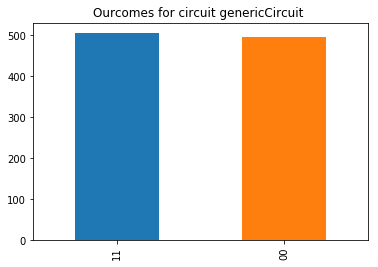

[array([ 0.7071+0.j,  0.    +0.j,  0.    +0.j, -0.7071+0.j])] [0.0, 0.0]


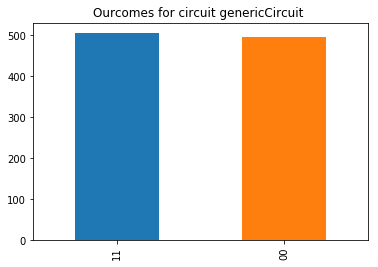

[array([0.    +0.j, 0.7071+0.j, 0.7071+0.j, 0.    +0.j])] [0.0, 0.0]


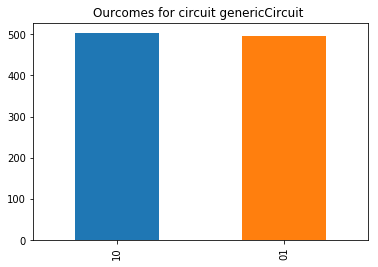

[array([ 0.    +0.j,  0.7071+0.j, -0.7071+0.j,  0.    +0.j])] [0.0, 0.0]


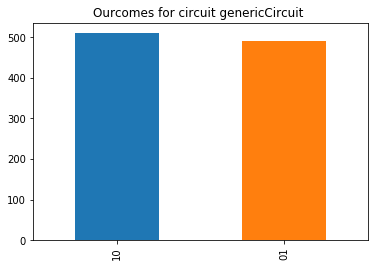

In [9]:
for gateSet in bell_gates:
    qc = QuantumCircuit(QuantumRegister(2), ClassicalRegister(2))
    qc.quantumRegister.applyMultipleGatesAtOnce(qc.classicalRegister, gate_instructions=gateSet) # Give directly the list of tuples
    print(qc.quantumRegister.formatAmplitudes(), qc.classicalRegister.formatValues())
    qc.readOut('classical')
    qc.plotResults(stats=qc.generateStatistics(n_measurements=1000))
    plt.show()

The states are the same as in the sequential model and the results also look correct :)

In [10]:
'a' in ['a', 'b']

True

## Test the classical control routine

    Lets start with regsiters |00> and 00;
    Apply a bit flip to the second classical bit, i.e. 00 ---> 01;
    Apply then a classicaly controlled - X, from the second *bit* to the second qubit
    Final quantum state is |01>

In [11]:
gateSet = [('classicalControl', (1,1), 'X')]
qc = QuantumCircuit(QuantumRegister(2), ClassicalRegister(2))
print('Quantum register: ', qc.quantumRegister.formatAmplitudes())
print('Classical register:', qc.classicalRegister.formatValues())
qc.classicalRegister.flip(1)
print('Cclassical register after the flip:', qc.classicalRegister.formatValues())
qc.quantumRegister.applyMultipleGatesAtOnce(qc.classicalRegister, gateSet) # Give directly the list of tuples
print('Quantum register', qc.quantumRegister.formatAmplitudes())

#### Assertion ####
assert qc.quantumRegister.amplitudes.all() == np.complex128([(0+0j), (1+0j), (0+0j), (0+0j)]).all()

Quantum register:  [(1+0j), 0j, 0j, 0j]
Classical register: [0.0, 0.0]
Cclassical register after the flip: [0.0, 1.0]
Quantum register [array([0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j])]


# Test a large state

In [12]:
hadamards = [('H', 0), ('H', 1), ('H', 2), ('H', 3), ('H', 4), ('H', 5)]
Cz = [('H', 1),('cnot', (0,1)),('H', 1),
      ('H', 2),('cnot', (1,2)),('H', 2),
      ('H', 3),('cnot', (2,3)),('H', 3),
      ('H', 4),('cnot', (3,4)),('H', 4),
      ('H', 1),('cnot', (4,1)),('H', 1)]
gateInstructions = hadamards+Cz

In [13]:
qc = QuantumCircuit(QuantumRegister(5), ClassicalRegister(2))
qc.quantumRegister.applyMultipleGatesAtOnce(qc.classicalRegister, gateInstructions) # Give directly the list of tuples
print('Quantum register', qc.quantumRegister.formatAmplitudes())
fiveQubitStabiizer = qc.quantumRegister.amplitudes

Quantum register [array([ 0.1768+0.j,  0.1768+0.j,  0.1768+0.j,  0.1768+0.j,  0.1768+0.j,
        0.1768+0.j, -0.1768+0.j, -0.1768+0.j,  0.1768+0.j,  0.1768+0.j,
        0.1768+0.j,  0.1768+0.j, -0.1768+0.j, -0.1768+0.j,  0.1768+0.j,
        0.1768+0.j, -0.1768+0.j, -0.1768+0.j,  0.1768+0.j,  0.1768+0.j,
       -0.1768+0.j, -0.1768+0.j, -0.1768+0.j, -0.1768+0.j,  0.1768+0.j,
        0.1768+0.j, -0.1768+0.j, -0.1768+0.j, -0.1768+0.j, -0.1768+0.j,
       -0.1768+0.j, -0.1768+0.j])]


In [14]:
stabilizers = [[('X', 0), ('Z', 4), ('Z',2)],
               [('X', 1), ('Z', 2), ('Z',0)],
               [('X', 2), ('Z', 3), ('Z',1)],
               [('X', 3), ('Z', 4), ('Z',2)],
               [('X', 4), ('Z', 0), ('Z',3)]]
for stab in stabilizers:
    print(stab)
    qc.quantumRegister.applyMultipleGatesAtOnce(qc.classicalRegister, stab) # Give directly the list of tuples
    assert qc.quantumRegister.amplitudes.all() == fiveQubitStabiizer.all()

[('X', 0), ('Z', 4), ('Z', 2)]
[('X', 1), ('Z', 2), ('Z', 0)]
[('X', 2), ('Z', 3), ('Z', 1)]
[('X', 3), ('Z', 4), ('Z', 2)]
[('X', 4), ('Z', 0), ('Z', 3)]


As expected, the stabilizers do not change the state of the system :)

# Benchmark whith large ensambles

In [15]:
%%timeit
hadamards = [('H', 0), ('H', 1), ('H', 2), ('H', 3), ('H', 4), ('H', 5)]
Cz = [('H', 1),('cnot', (0,1)),('H', 1),
      ('H', 2),('cnot', (1,2)),('H', 2),
      ('H', 3),('cnot', (2,3)),('H', 3),
      ('H', 4),('cnot', (3,4)),('H', 4),
      ('H', 1),('cnot', (4,1)),('H', 1)]
gateInstructions = hadamards+Cz
qc = QuantumCircuit(QuantumRegister(5), ClassicalRegister(2))
qc.quantumRegister.applyMultipleGatesAtOnce(qc.classicalRegister, gateInstructions) # Give directly the list of tuples
fiveQubitStabiizer = qc.quantumRegister.amplitudes

11.5 ms ± 1.45 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [16]:
%%timeit
hadamards = [('H', 0), ('H', 1), ('H', 2), ('H', 3), ('H', 4), ('H', 5)]
Cz = [('H', 1),('cnot', (0,1)),('H', 1),
      ('H', 2),('cnot', (1,2)),('H', 2),
      ('H', 3),('cnot', (2,3)),('H', 3),
      ('H', 4),('cnot', (3,4)),('H', 4),
      ('H', 1),('cnot', (4,1)),('H', 1),
      ('H', 1),('cnot', (0,9)),('H', 1),
      ('H', 2),('cnot', (1,8)),('H', 2),
      ('H', 3),('cnot', (2,7)),('H', 3),
      ('H', 4),('cnot', (3,6)),('H', 4),
      ('H', 1),('cnot', (4,5)),('H', 1)]
gateInstructions = hadamards+Cz
qc = QuantumCircuit(QuantumRegister(10), ClassicalRegister(2))
qc.quantumRegister.applyMultipleGatesAtOnce(qc.classicalRegister, gateInstructions) # Give directly the list of tuples
fiveQubitStabiizer = qc.quantumRegister.amplitudes

4.93 s ± 646 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [17]:
%%timeit
hadamards = [('H', 0), ('H', 1), ('H', 2), ('H', 3), ('H', 4), ('H', 5)]
Cz = [('H', 1),('cnot', (0,1)),('H', 1),
      ('H', 2),('cnot', (1,2)),('H', 2),
      ('H', 3),('cnot', (2,3)),('H', 3),
      ('H', 4),('cnot', (3,4)),('H', 4),
      ('H', 1),('cnot', (4,1)),('H', 1),
      ('H', 1),('cnot', (0,9)),('H', 1),
      ('H', 2),('cnot', (1,8)),('H', 2),
      ('H', 3),('cnot', (2,7)),('H', 3),
      ('H', 4),('cnot', (3,6)),('H', 4),
      ('H', 1),('cnot', (4,5)),('H', 1),
      ('H', 1),('cnot', (0,10)),('H', 1),
#       ('H', 2),('cnot', (1,11)),('H', 2),
#       ('H', 3),('cnot', (2,12)),('H', 3),
#       ('H', 4),('cnot', (3,13)),('H', 4),
#       ('H', 1),('cnot', (4,14)),('H', 1)
     ]
gateInstructions = hadamards+Cz
qc = QuantumCircuit(QuantumRegister(11), ClassicalRegister(1))
qc.quantumRegister.applyMultipleGatesAtOnce(qc.classicalRegister, gateInstructions) # Give directly the list of tuples
fiveQubitStabiizer = qc.quantumRegister.amplitudes

16.8 s ± 1.12 s per loop (mean ± std. dev. of 7 runs, 1 loop each)
